# SOCIAL MEDIA SCRAPPING

## Installing necessary Libraries

### PRAW is like a helper tool for Python programmers who want to talk to Reddit 

In [1]:
#!pip install praw

# Authentication

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="IUOXZ7RsQA-ktltw7dWMnA",
    client_secret="ddT4Zd3RaPB5bCvM2y7dU5AePN8pDw",
    user_agent=user_agent
)

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"trump"** subreddit channel will be use for this project

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("trump").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Announcement about the sub during the election cycle
ynco1w
pointsouturhypocrisy
1667697254.0
140
0.92
https://www.reddit.com/r/trump/comments/ynco1w/announcement_about_the_sub_during_the_election/
0


**Get total comment in Subreddit**

In [5]:
headlines = set()
for submission in reddit.subreddit("trump").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

618


In [6]:
#Create a dataframe from the scrapped data 
trump_df = pd.DataFrame(headlines)
trump_df.head()

,0
0,This is absolutely great. Former Trump advisor...
1,Does Biden’s Immigration Policy Promote Exploi...
2,Tax Talk
3,"Don’t forget, they praised Barbara Walters for..."
4,Trump's smartest choice for Vp. Hear me out:


In [7]:
trump_df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
trump_df.columns = ['Titles']

In [9]:
trump_df.head()

,Titles
0,This is absolutely great. Former Trump advisor...
1,Does Biden’s Immigration Policy Promote Exploi...
2,Tax Talk
3,"Don’t forget, they praised Barbara Walters for..."
4,Trump's smartest choice for Vp. Hear me out:


In [10]:
trump_df.Titles.duplicated().sum() 

0

### We are using a function cleanTxt that takes a text input and performs several cleaning operations on it. The cleaning operations include removing mentions (text starting with '@'), removing hashtags ('#'), removing retweets (text starting with 'RT'), removing hyperlinks, and removing colons

In [11]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
trump_df["Titles"]= trump_df["Titles"].apply(cleanTxt)

#Show the clean text
trump_df.head()

,Titles
0,This is absolutely great. Former Trump advisor...
1,Does Biden’s Immigration Policy Promote Exploi...
2,Tax Talk
3,"Don’t forget, they praised Barbara Walters for..."
4,Trump's smartest choice for Vp. Hear me out


###  We are creating a function named remove_emoji that uses a regular expression to match and remove various Unicode ranges representing emojis and symbols.

In [12]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
trump_df["Titles"]= trump_df["Titles"].apply(remove_emoji)

#Show the clean text
trump_df.head()

,Titles
0,This is absolutely great. Former Trump advisor...
1,Does Biden’s Immigration Policy Promote Exploi...
2,Tax Talk
3,"Don’t forget, they praised Barbara Walters for..."
4,Trump's smartest choice for Vp. Hear me out


## Installing TextBlob, which is a Python library for processing textual data

In [13]:
#!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     -- ---------------------------------- 41.0/636.8 kB 487.6 kB/s eta 0:00:02
     ------------ ------------------------- 204.8/636.8 kB 1.8 MB/s eta 0:00:01
     ---------------------------------- --- 583.7/636.8 kB 4.1 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 3.6 MB/s eta 0:00:00


In [15]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [19]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
trump_df['Subjectivity'] = trump_df['Titles'].apply(getSubjectivity)
trump_df['Polarity'] = trump_df['Titles'].apply(getPolarity)

#Now display data
trump_df.head()

,Titles,Subjectivity,Polarity,Insight
0,This is absolutely great. Former Trump advisor...,0.375,0.4,Positive
1,Does Biden’s Immigration Policy Promote Exploi...,0.000,0.0,Neutral
2,Tax Talk,0.000,0.0,Neutral
3,"Don’t forget, they praised Barbara Walters for...",0.900,-0.6,Negative
4,Trump's smartest choice for Vp. Hear me out,0.000,0.0,Neutral


In [20]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
trump_df["Insight"] = trump_df["Polarity"].apply(getInsight)

trump_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,This is absolutely great. Former Trump advisor...,0.375000,0.400000,Positive
1,Does Biden’s Immigration Policy Promote Exploi...,0.000000,0.000000,Neutral
2,Tax Talk,0.000000,0.000000,Neutral
3,"Don’t forget, they praised Barbara Walters for...",0.900000,-0.600000,Negative
4,Trump's smartest choice for Vp. Hear me out,0.000000,0.000000,Neutral
5,"Who is Fiona Ching, and why is she buying so m...",0.500000,0.500000,Positive
6,FJB 2024,0.000000,0.000000,Neutral
7,Biden Campaign Wants Taylor Swift's Help,0.100000,0.200000,Positive
8,Alina Habba's Fiery Comments after E. Jean Car...,0.000000,0.000000,Neutral
9,She doesn't fall for MSNBC's bullshit.,0.000000,0.000000,Neutral


# Data Visualization

In [21]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

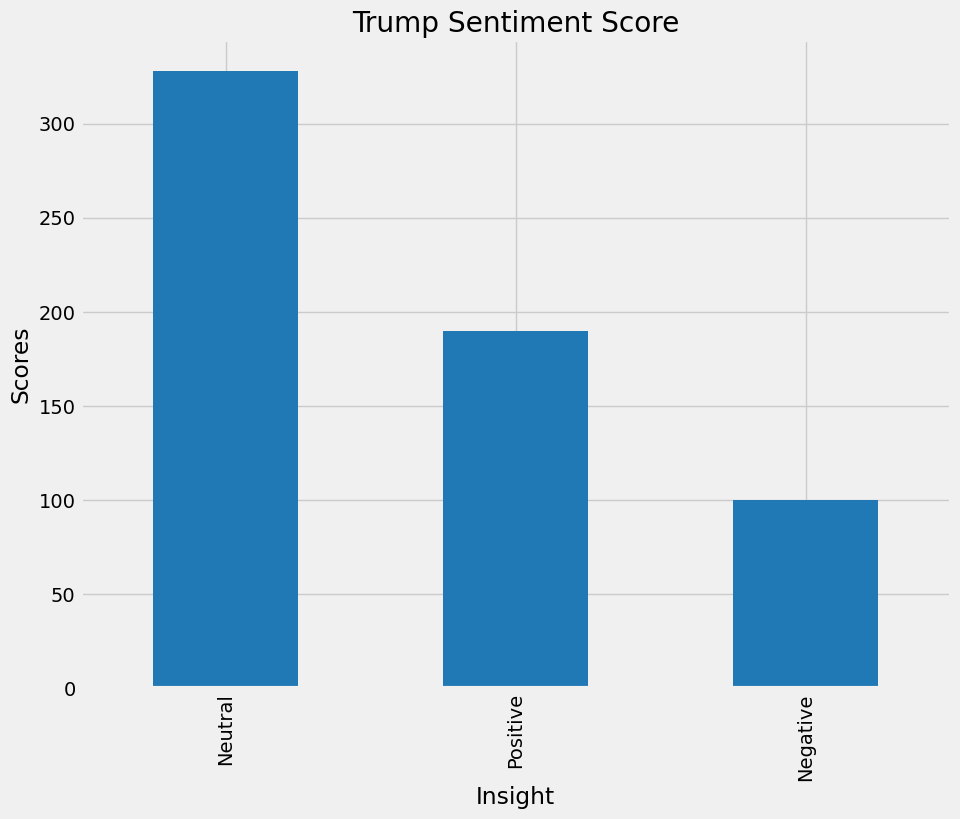

In [23]:
#Plot the values count of sentiment
plt.title("Trump Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
trump_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

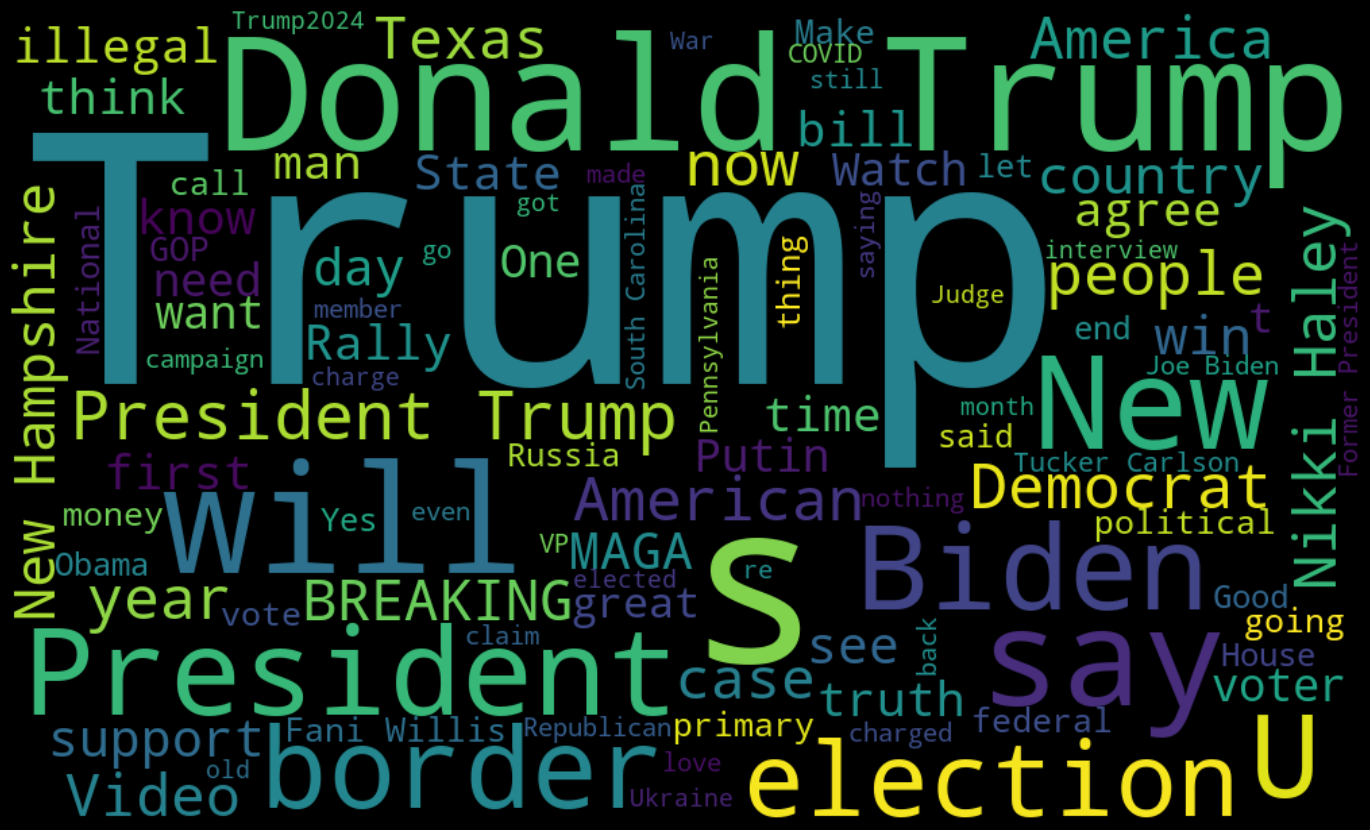

In [24]:
text = ' '.join( [twts for twts in trump_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

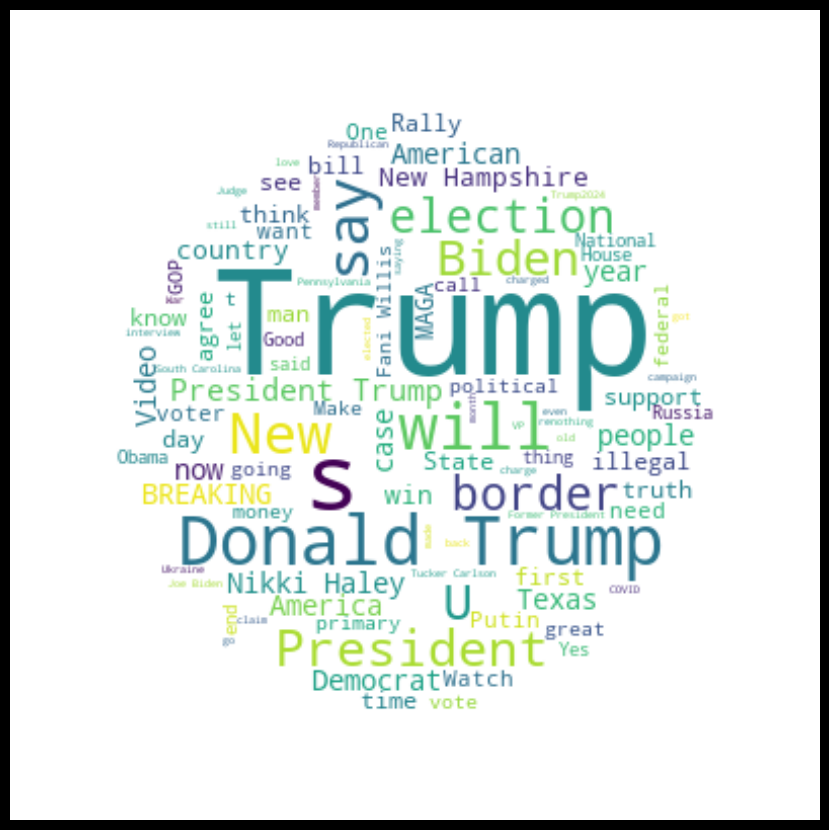

In [45]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the mask image
mask = np.array(Image.open("Pv6V9.png"))

# Join all tweet titles into a single string
text = ' '.join([twts for twts in trump_df['Titles']])

# Generate word cloud with the specified mask
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=STOPWORDS,
                      background_color="white",
                      mask=mask).generate(text)

# Display the generated image
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


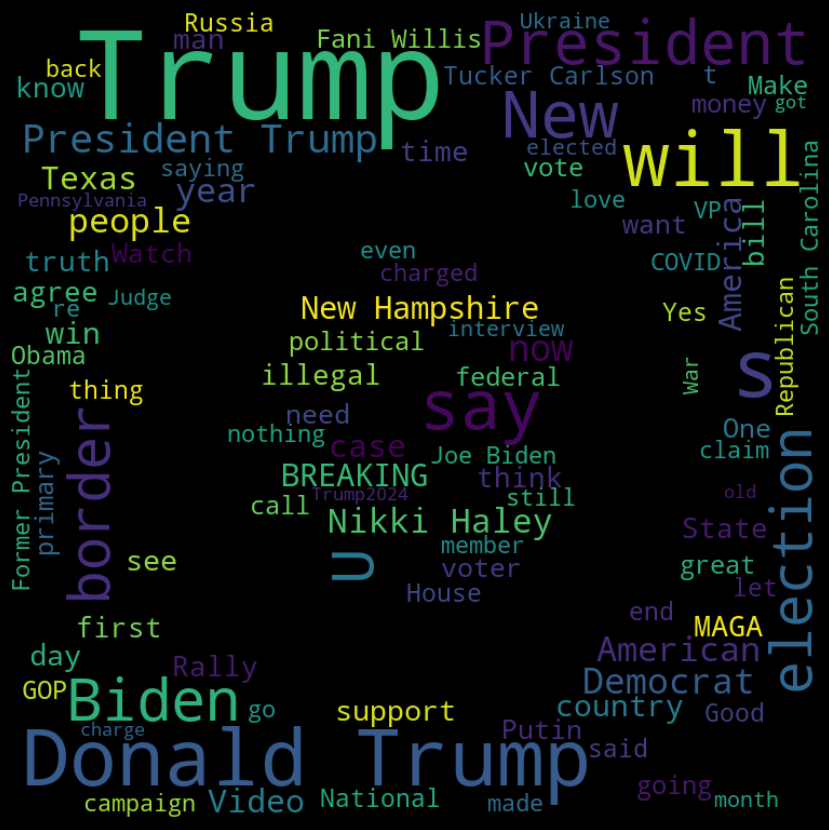

In [44]:
# Load the mask image
mask = np.array(Image.open("1234.png"))

# Join all tweet titles into a single string
text = ' '.join([twts for twts in trump_df['Titles']])

# Generate word cloud with the specified mask
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=STOPWORDS,
                      background_color="black",
                      mask=mask).generate(text)

# Display the generated image
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()